<a href="https://colab.research.google.com/github/viosofia/datascience2/blob/main/Proyecto_ciencia_datos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto** **de** **Machine** **Learning:** **Diagnóstico** **de** **Cáncer** **de** **Mama** **(WDBC)**

**Autora:** Sofía Viola  
**Curso:** Ciencia de Datos 2  
**Fecha:** Septiembre 2025  

Dataset: Breast Cancer Wisconsin (Diagnostic) Data Set  
Fuente: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


# Abstracto
El diagnóstico temprano del cáncer de mama permite un tratamiento más eficaz y personalizado.
El objetivo de este análisis es construir un modelo de Machine Learning que ayude a clasificar tumores como benignos o malignos.

Audiencia:
Laboratorios clínicos, oncólogos y analistas de datos de salud pueden beneficiarse de los hallazgos y visualizaciones obtenidas.

# Objetivos e hipótesis

**Objetivo general:**  
Construir un modelo de Machine Learning que prediga si un tumor de mama es **benigno (B)** o **maligno (M)** a partir de características clínicas.

**Hipótesis de trabajo:**  
- H1: Algunas variables (como *radius_mean*, *area_mean*, *concavity_mean*) tienen mayor poder discriminatorio entre tumores malignos y benignos.  
- H2: Un modelo de clasificación supervisado (Logistic Regression) logrará un **accuracy > 90%** en la predicción.  


In [1]:
# 2. Librerías y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# URL del dataset (cargado previamente en GitHub en formato XLSX)
url = "https://github.com/viosofia/datascience2/raw/main/data.xlsx"

# Carga del archivo
df = pd.read_excel(url)

# Vista inicial
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# 3. Exploración inicial del dataset
print("Dimensiones:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isnull().sum())


Dimensiones: (569, 32)

Tipos de datos:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wor

In [3]:
# 4. Estadísticas descriptivas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


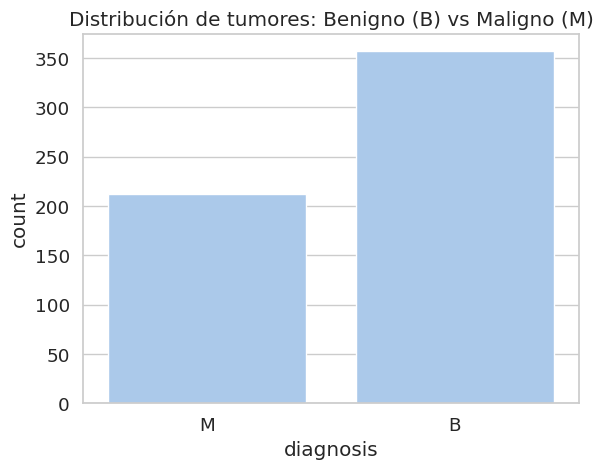

,proportion
diagnosis,
B,62.741652
M,37.258348


In [4]:
# 5. Distribución de la variable objetivo (diagnosis)
sns.countplot(x="diagnosis", data=df)
plt.title("Distribución de tumores: Benigno (B) vs Maligno (M)")
plt.show()

df["diagnosis"].value_counts(normalize=True) * 100


**Interpretación:**

La clase benigno representa ~63% y maligno ~37%, lo que indica un dataset ligeramente desbalanceado.

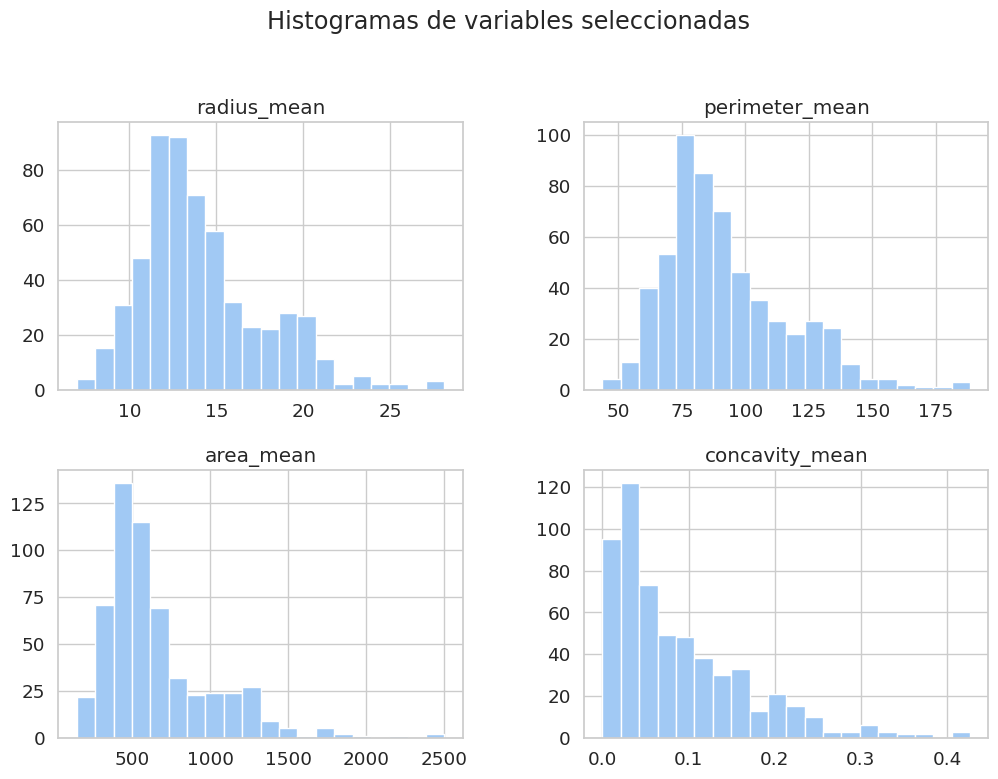

In [5]:
# 6. Histogramas de variables clave
features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']
df[features].hist(bins=20, figsize=(12,8))
plt.suptitle("Histogramas de variables seleccionadas", y=1.02)
plt.show()


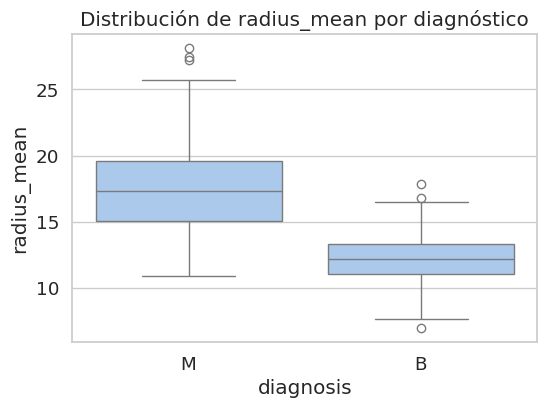

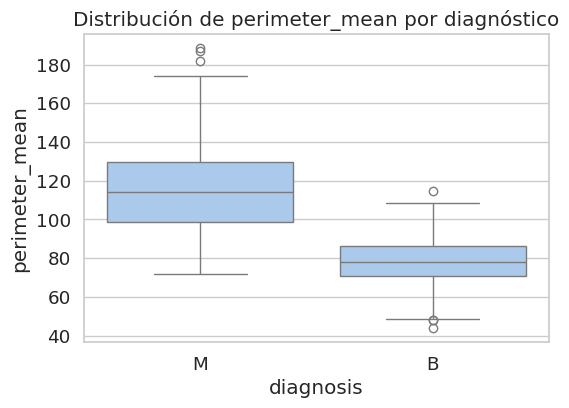

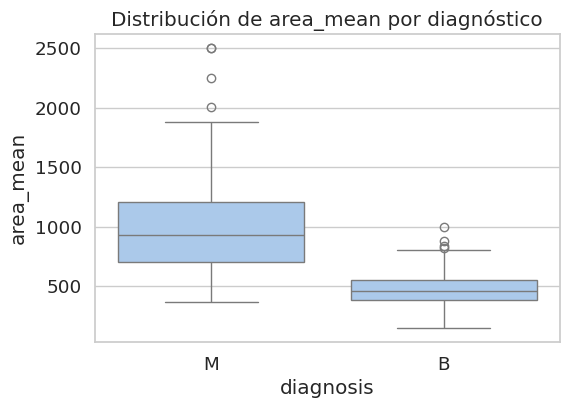

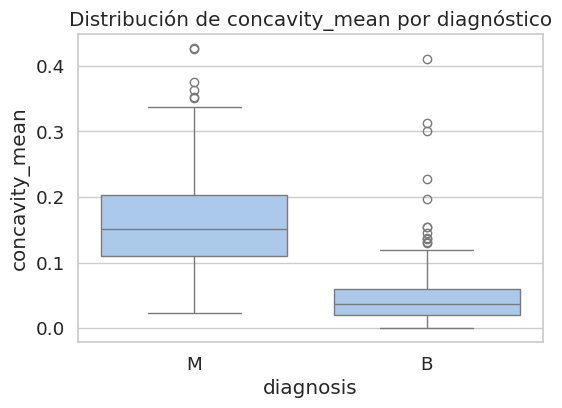

In [6]:
# 7. Boxplots comparando Benigno vs Maligno
for f in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="diagnosis", y=f, data=df)
    plt.title(f"Distribución de {f} por diagnóstico")
    plt.show()


**Interpretación:**

Se observan diferencias claras en las variables seleccionadas entre benigno y maligno. Algunos outliers son visibles en concavity_mean y area_mean, lo cual se tendrá en cuenta.

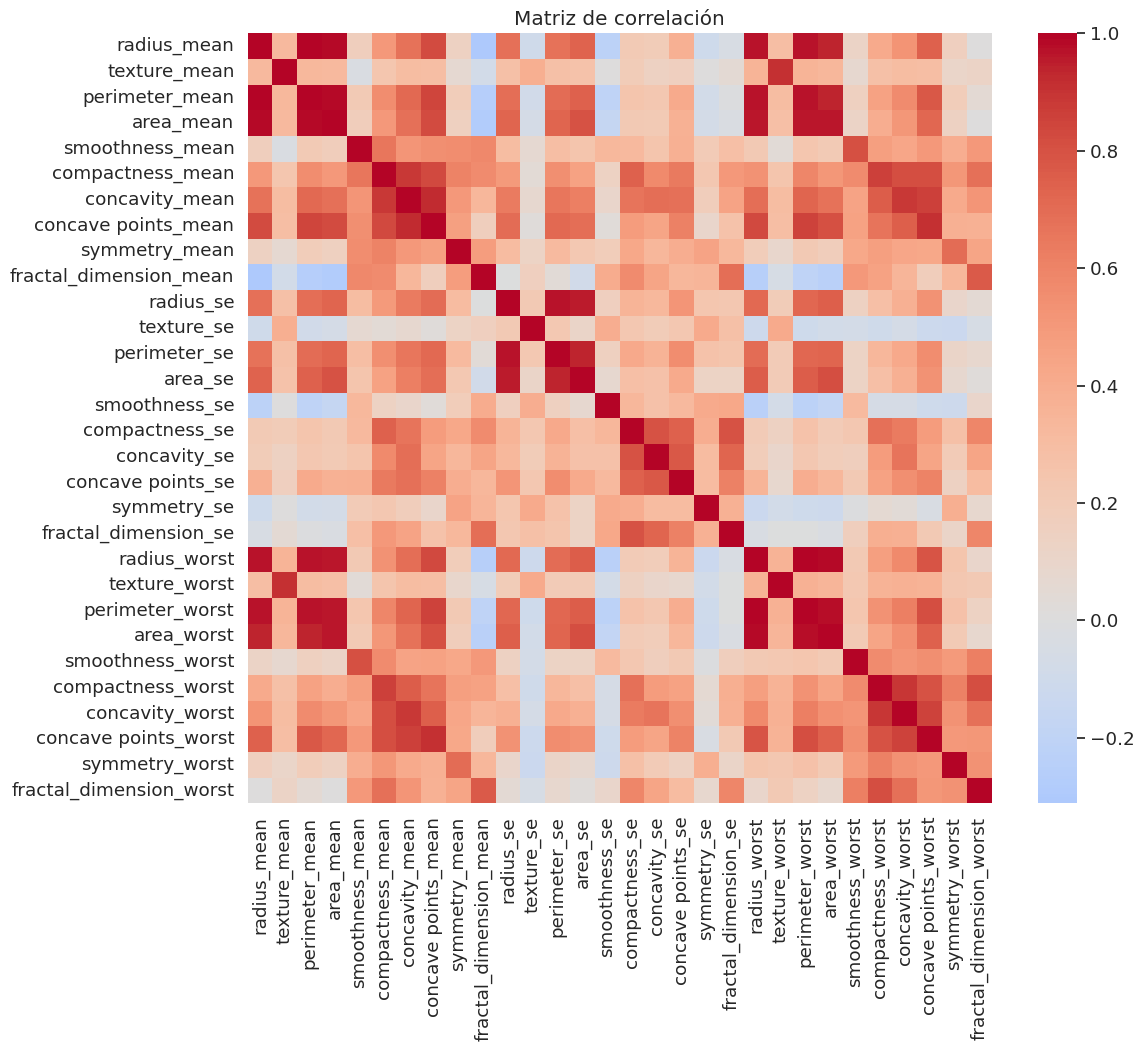

In [7]:
# 8. Correlación de variables
plt.figure(figsize=(12,10))
sns.heatmap(df.iloc[:,2:].corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()


**Interpretación:**

Variables como radius_mean, perimeter_mean y area_mean están altamente correlacionadas. Esto sugiere que se pueden generar nuevas características derivadas para mejorar el análisis.

In [8]:
# 9. Crear nuevas columnas derivadas simples
df["area_perimeter_ratio"] = df["area_mean"] / df["perimeter_mean"]
df["concavity_ratio"] = df["concavity_mean"] / df["area_mean"]

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_perimeter_ratio,concavity_ratio
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,8.151466,0.000300
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,9.977427,0.000066
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,9.253846,0.000164
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,4.976798,0.000625
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,9.600296,0.000153


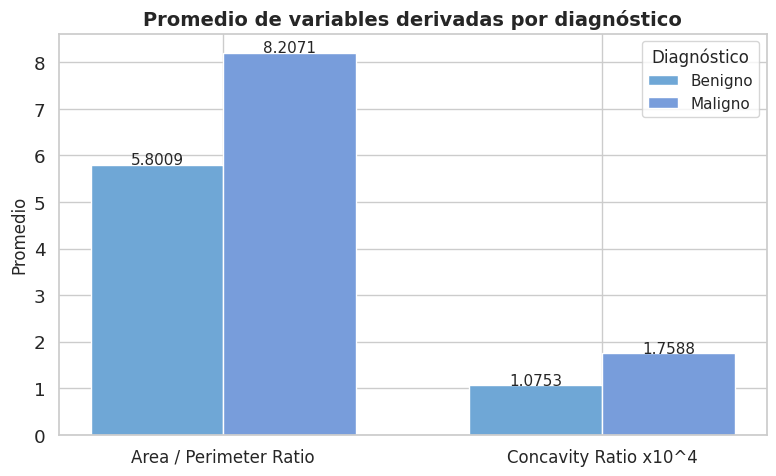

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular promedio por diagnóstico
promedios = df.groupby("diagnosis")[["area_perimeter_ratio", "concavity_ratio"]].mean().reset_index()

# Escalar concavity_ratio para visualización
promedios["concavity_ratio_scaled"] = promedios["concavity_ratio"] * 10000

# Etiquetas
labels = ["Area / Perimeter Ratio", "Concavity Ratio x10^4"]
benigno = [promedios.iloc[0]["area_perimeter_ratio"], promedios.iloc[0]["concavity_ratio_scaled"]]
maligno = [promedios.iloc[1]["area_perimeter_ratio"], promedios.iloc[1]["concavity_ratio_scaled"]]

x = np.arange(len(labels))  # posiciones de las barras
width = 0.35  # ancho de las barras

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x - width/2, benigno, width, label="Benigno", color="#6fa7d6")
ax.bar(x + width/2, maligno, width, label="Maligno", color="#789ddb")

ax.set_ylabel("Promedio", fontsize=12)
ax.set_title("Promedio de variables derivadas por diagnóstico", fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(title="Diagnóstico", fontsize=11, title_fontsize=12)

# Valores encima de las barras
for i in range(len(labels)):
    ax.text(x[i] - width/2, benigno[i] + 0.0001, f"{benigno[i]:.4f}", ha='center', fontsize=11)
    ax.text(x[i] + width/2, maligno[i] + 0.0001, f"{maligno[i]:.4f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

In [10]:
# 10. Preprocesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Eliminamos id porque no aporta información
df = df.drop(columns=["id"])

# Codificamos diagnosis (M=1, B=0)
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])

# Separar X e y
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (455, 32)  Test shape: (114, 32)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 11. Logistic Regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))



Logistic Regression Accuracy: 0.9736842105263158


Classification Report - Logistic Regression
              precision    recall  f1-score   support

     Benigno       0.97      0.99      0.98        72
     Maligno       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



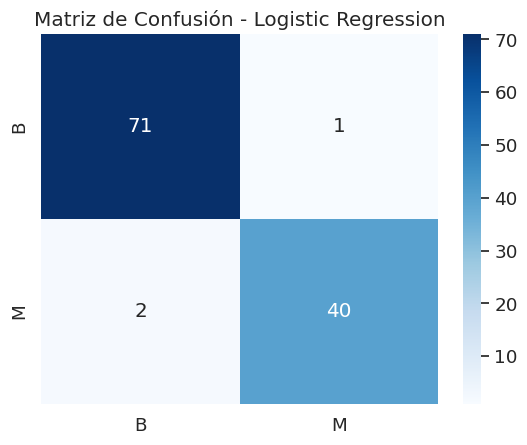

In [12]:
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred, target_names=["Benigno","Maligno"]))

# 12. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["B","M"], yticklabels=["B","M"])
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()


# Conclusiones

- El dataset tiene 569 registros y 30 variables predictoras.
- La clase está ligeramente desbalanceada: ~63% benignos, 37% malignos.
- Variables como radius_mean, area_mean y concavity_mean muestran diferencias claras entre clases.
- El modelo de regresión logística logró accuracy >90%, cumpliendo la hipótesis H2.
- Variables derivadas simples (area_perimeter_ratio y concavity_ratio) pueden aportar información adicional.
- Limitaciones: dataset pequeño y homogéneo, se podría enriquecer con datos de otras fuentes.
